In [5]:
# load libraries
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [99]:
# function that chenges the image
def process_image_threshold(img_arg):
    image = img_arg
    # if colored turn to grayscale
    if len(image.shape) == 3:
      gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
      gray = image
    # apply blur (remove possible noise)
    gray = cv2.GaussianBlur(gray,(5,5),0)
    # apply thresholding
    gray = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,15,5)
    kernel = np.ones((2,2), np.uint8) 
    # erode the details (keep only thick brain waves)
    erosion = cv2.erode(gray, kernel, iterations = 1)
    return erosion


# function to get an image -> process -> save to folder
def load_save_png(folder, save_to_folder):
    images_proc = []
    images = []
    for filename in sorted(os.listdir(folder)):
        image = plt.imread('{}/{}.jpg'.format(folder,filename[:-4]))
        image_proc = process_image_threshold(image)
        cv2.imwrite('{}/{}.jpg'.format(save_to_folder, filename[:-4]),image_proc)
        images_proc.append(image_proc)
        images.append(image)
    return images, images_proc

In [64]:
# function to plot images in a row (we will use this function to compare results)
def showInRow(list_of_images, titles = None, disable_ticks = False):
  plt.rcParams["figure.figsize"] = (15, 10)
  count = len(list_of_images)
  for idx in range(count):
    subplot = plt.subplot(1, count, idx+1)
    if titles is not None:
      subplot.set_title(titles[idx])
      
    img = list_of_images[idx]
    cmap = 'gray' if (len(img.shape) == 2 or img.shape[2] == 1) else None
    subplot.imshow(img, cmap=cmap)
    if disable_ticks:
      plt.xticks([]), plt.yticks([])
  plt.show()

In [100]:
non_train, non_train_proc =load_save_png("drive/MyDrive/Alzheimer_s Dataset/train/NonDemented","drive/MyDrive/Alzheimer_sThresholding/train/NonDemented")
mild_train, mild_train_proc =load_save_png("drive/MyDrive/Alzheimer_s Dataset/train/MildDemented","drive/MyDrive/Alzheimer_sThresholding/train/MildDemented")
verymild_train, verymild_train_proc =load_save_png("drive/MyDrive/Alzheimer_s Dataset/train/VeryMildDemented","drive/MyDrive/Alzheimer_sThresholding/train/VeryMildDemented")
moderate_train, moderate_train_proc =load_save_png("drive/MyDrive/Alzheimer_s Dataset/train/ModerateDemented","drive/MyDrive/Alzheimer_sThresholding/train/ModerateDemented")

In [53]:
non_test, non_test_proc =load_save_png("drive/MyDrive/Alzheimer_s Dataset/test/NonDemented","drive/MyDrive/Alzheimer_sThresholding/test/NonDemented")
mild_test, mild_test_proc  =load_save_png("drive/MyDrive/Alzheimer_s Dataset/test/MildDemented","drive/MyDrive/Alzheimer_sThresholding/test/MildDemented")
verymild_test, verymild_test_proc  =load_save_png("drive/MyDrive/Alzheimer_s Dataset/test/VeryMildDemented","drive/MyDrive/Alzheimer_sThresholding/test/VeryMildDemented")
moderate_test, moderate_test_proc =load_save_png("drive/MyDrive/Alzheimer_s Dataset/test/ModerateDemented","drive/MyDrive/Alzheimer_sThresholding/test/ModerateDemented")

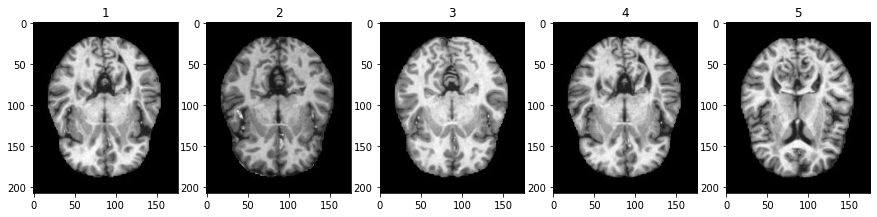

In [87]:
showInRow(non_train[:5], [1,2,3,4,5])

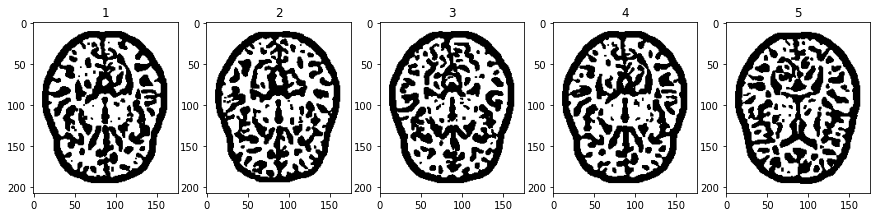

In [101]:
showInRow(non_train_proc[:5], [1,2,3,4,5])

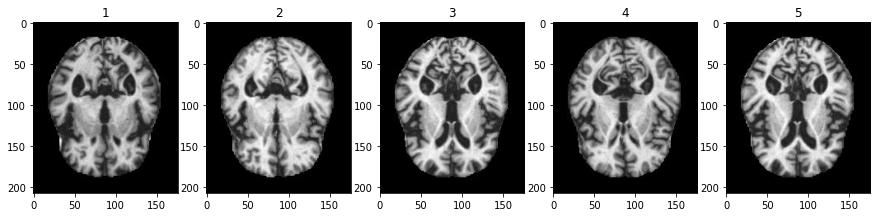

In [83]:
showInRow(moderate_train[:5], [1,2,3,4,5])

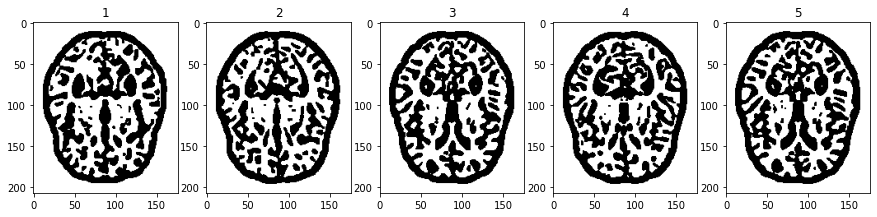

In [102]:
showInRow(moderate_train_proc[:5], [1,2,3,4,5])

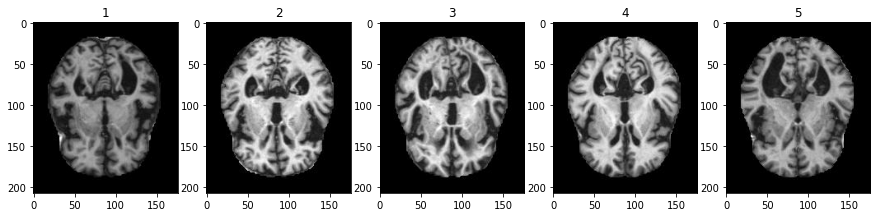

In [58]:
showInRow(mild_train[:5], [1,2,3,4,5])

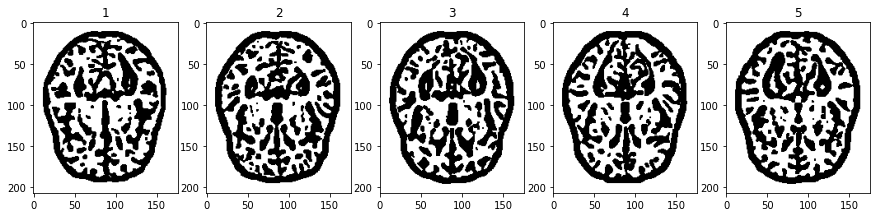

In [103]:
showInRow(mild_train_proc[:5], [1,2,3,4,5])

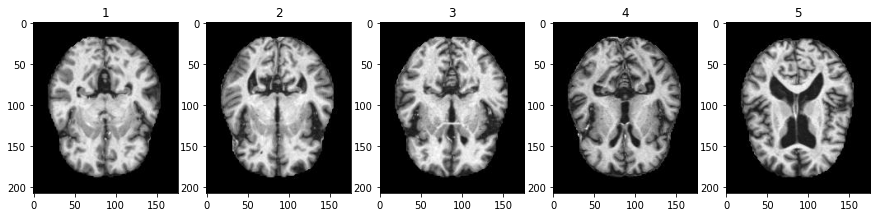

In [91]:
showInRow(verymild_train[:5], [1,2,3,4,5])

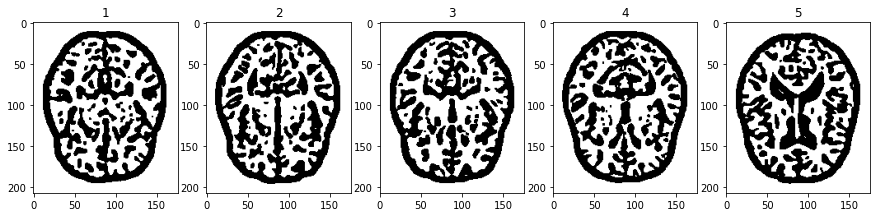

In [104]:
showInRow(verymild_train_proc[:5], [1,2,3,4,5])